In [1]:
class TreeNode:
    def __init__(self, key, val, left=None, right=None, parent=None):
        self.key = key
        self.payload = val
        self.left_child = left
        self.right_child= right
        self.parent = parent
        self.balanceFactor = 0
        
    def __iter__(self):
        if self:
            if self.has_left_child():
                for elem in self.left_child:
                    yield elem
                    
            yield self.key
            
            if self.has_right_child():
                for elem in self.right_child:
                    yield elem
                    
    def has_left_child(self):
        return self.left_child
    
    def has_right_child(self):
        return self.right_child
    
    def is_left_child(self):
        return self.parent and self.parent.left_child is self
    
    def is_right_child(self):
        return self.parent and self.parent.right_child is self
    
    def is_root(self):
        return not self.parent
    
    def is_leaf(self):
        return not self.left_child and not self.right_child
    
    def has_any_children(self):
        return self.right_child or self.left_child
    
    def has_both_children(self):
        return self.right_child and self.left_child
    
    def replace_node_data(self, key, value, lc, rc):
        self.key = key
        self.payload = value
        self.left_child = lc
        self.right_child = rc
        
        if self.has_left_child():
            self.left_child.parent = self
            
        if self.has_right_child():
            self.right_child.parent = self
            
    def splice_out(self):
        if self.is_leaf():
            if self.is_left_child():
                self.parent.left_child = None
            else:
                self.parent.right_child = None
        elif self.has_any_children():
            if self.has_left_child():
                if self.is_left_child():
                    self.parent.left_child = self.left_child
                else:
                    self.parent.right_child = self.left_child
                    
                self.left_child.parent = self.parent
            else:  # has a right child
                if self.is_left_child():
                    self.parent.left_child = self.right_child
                else:
                    self.parent.right_child = self.right_child
                    
                self.right_child.parent = self.parent
                
    def find_successor(self):
        succ = None
        
        if self.has_right_child():
            succ = self.right_child.find_min()
        else:  # no right child? Then we work on left child
            if self.parent:  # it is an intermediate node
                if self.is_left_child():
                    succ = self.parent
                else:  # is a right child
                    self.parent.right_child = None
                    succ = self.parent.find_successor()
                    self.parent.right_child = self
        return succ
    
    
    def find_min(self):
        current = self
        
        while current.has_left_child():
            current = current.left_child

        return current

In [2]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        self.size = 0
    
    def __len__(self):
        return self.length()
    
    def __iter__(self):
        return self.root.__iter__()
    
    def __setitem__(self, k, v):
        self.put(k, v)
  
    def __getitem__(self, k):
        return self.get(k)
    
    def __contains__(self, k):
        #if self._get(key, self.root):
        #    return True
        #else:
        #    return False
        
        return self._get(k, self.root) is not None

    def __delitem__(self, k):
        self.delete(k)
    
    def length(self):
        return self.size
    
    def put(self, key, val):
        if self.root:
            self._put(key, val, self.root)
        else:  # the tree is non-existient
            self.root = TreeNode(key, val)
            
        self.size += 1
        
    def _put(self, key, val, current_node):
        if key < current_node.key:
            if current_node.has_left_child():
                self._put(key, val, current_node.left_child)
            else:
                current_node.left_child = TreeNode(key, val, parent=current_node)
        else:
            if current_node.has_right_child():
                self._put(key, val, current_node.right_child)
            else:
                current_node.right_child = TreeNode(key, val, parent=current_node)
                
    def get(self, key):
        if self.root:
            res = self._get(key, self.root)
            if res:
                # return the value of our TreeNode with matching key
                return res.payload
            else:
                return None
        else:
            return None
        
    def _get(self, key, current_node):
        if not current_node:
            return None
        elif current_node.key == key:
            return current_node
        elif key < current_node.key:
            return self._get(key, current_node.left_child)
        else:
            return self._get(key, current_node.right_child)
        
    def delete(self, key):
        if self.size > 1:
            node_to_remove = self._get(key, self.root)
            if node_to_remove:
                self.remove(node_to_remove)
                self.size -= 1
            else:
                raise KeyError("Key not found in tree!")
        elif self.size == 1 and self.root.key == key:
            # tree is completely removed, since it was only one node
            self.root = None
            self.size -= 1
        else:
            raise KeyError("Key not found in tree!")
            
    def remove(self, current_node):
        if current_node.is_leaf():  # leaf
            #if current_node == current_node.parent.left_child:
            if current_node.is_left_child():   
                current_node.parent.left_child = None
            else:
                current_node.parent.right_child = None
        elif current_node.has_both_children():  # interior or root
            succ = current_node.find_successor()
            succ.splice_out()
            current_node.key = succ.key
            current_node.payload = succ.payload
        else:  # node has one child
            if current_node.has_left_child():
                if current_node.is_left_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.left_child
                elif current_node.is_right_child():
                    current_node.left_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.left_child
                else: #root
                    current_node.replace_node_data(current_node.left_child.key,
                                                   current_node.left_child.payload,
                                                   current_node.left_child.left_child,
                                                   current_node.left_child.right_child)
            else: # have right child
                if current_node.is_left_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.left_child = current_node.right_child
                elif current_node.is_right_child():
                    current_node.right_child.parent = current_node.parent
                    current_node.parent.right_child = current_node.right_child
                else:
                    current_node.replace_node_data(current_node.right_child.key,
                                                   current_node.right_child.payload,
                                                   current_node.right_child.left_child,
                                                   current_node.right_child.right_child) 

In [3]:
node = TreeNode("foo", "bar")

In [4]:
node.balanceFactor

0

In [5]:
node.balanceFactor = 0

In [85]:
node.balanceFactor

0

## AVL Tree Rules

 1. If a subtree needs a left rotation to bring it to balance:

   * First, check the balance factor of the right child.
   * If the right child is left heavy, then do a right rotation on the right child
   * Peform the original left rotation 
 1. If a subtree needs a right rotation to bring it to balance:
   * First, check the balance factor of the left child.
   * If the left child is right heavy, then do a left rotation on the left child
   * Peform the original right rotation

In [7]:
class AVLTreeNode(TreeNode):
    def __init__(self, *args, **kwargs):
        super(AVLTreeNode, self).__init__(*args, **kwargs)
        self.balance_factor = 0

In [8]:
class AVLBinarySearchTree(BinarySearchTree):
    def put(self, key, val):
        if self.root:
            self._put(key, val,self.root)
        else:
            self.root = AVLTreeNode(key, val)
        self.size = self.size + 1
        
    def _put(self, key, val, current_node):
        if key < current_node.key:
            if current_node.has_left_child():
                self._put(key, val, current_node.left_child)
            else:
                current_node.left_child = AVLTreeNode(key, val, parent=current_node)
                self.update_balance(current_node.left_child)  # AVL addition
        else:
            if current_node.has_right_child():
                self._put(key, val, current_node.right_child)
            else:
                current_node.right_child = AVLTreeNode(key, val, parent=current_node) 
                self.update_balance(current_node.right_child) # AVL
                
    def update_balance(self, node):
        if node.balance_factor > 1 or node.balance_factor < -1:
            self.rebalance(node)
            return
        
        if node.parent != None:
            if node.is_left_child():
                node.parent.balance_factor += 1
            elif node.is_right_child():
                node.parent.balance_factor -= 1
                
            if node.parent.balance_factor != 0:
                self.update_balance(node.parent)
                
    def rotate_left(self, rot_root):
        new_root = rot_root.right_child # New root is right child
        rot_root.right_child = new_root.left_child # right-left grandchild hops across
        
        if new_root.left_child != None: # Update parent link of hopping node
            new_root.left_child.parent = rot_root
        new_root.parent = rot_root.parent # Update parent link of new root
        
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_left_child():
                rot_root.parent.left_child = new_root
            else: # rot_root is right child
                rot_root.parent.right_child = new_root
        
        new_root.left_child = rot_root
        rot_root.parent = new_root # Finally assign the new root as parent of rot_root
        
        rot_root.balance_factor = (rot_root.balance_factor + 1 
                                   - min(new_root.balance_factor, 0))
        
        new_root.balance_factor = (new_root.balance_factor + 1
                                   + max(rot_root.balance_factor, 0))
           
    def rotate_right(self, rot_root):
        new_root = rot_root.left_child # New root is left child
        rot_root.left_child = new_root.right_child # left-right grandchild hops across
        
        if new_root.right_child != None: # Update parent link of hopping node
            new_root.right_child.parent = rot_root
        new_root.parent = rot_root.parent # Update parent link of new root
        
        if rot_root.is_root():
            self.root = new_root
        else:
            if rot_root.is_left_child():
                rot_root.parent.left_child = new_root
            else: # rot_root is right child
                rot_root.parent.right_child = new_root
        
        new_root.right_child = rot_root
        rot_root.parent = new_root # Finally assign the new root
        
        rot_root.balance_factor = (rot_root.balance_factor - 1 
                                   - max(new_root.balance_factor, 0))
        
        new_root.balance_factor = (new_root.balance_factor - 1
                                   + min(rot_root.balance_factor, 0))
        
    def rebalance(self, node):
        if node.balance_factor < 0:
            if node.right_child.balance_factor > 0:
                self.rotate_right(node.right_child)
                self.rotate_left(node)
            else:
                self.rotate_left(node)
        elif node.balance_factor > 0:
            if node.left_child.balance_factor < 0:
                self.rotate_left(node.left_child)
                self.rotate_right(node)
            else:
                self.rotate_right(node)

## Testing

In [9]:
import requests
from random import shuffle
import random
from graphviz import Digraph

class Stack:
    def __init__(self):
         self.items = []

    def is_empty(self):
         return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
         return self.items.pop()

    def peek(self):
         return self.items[-1]

    def size(self):
         return len(self.items)

In [10]:
def viz_tree(r):
    stack = Stack()
    g = Digraph(node_attr={'shape': 'record', 'height': '.1'})
    _id = 0
    current_node = r.root
    leftward = True
    current_root_num = 0
    
    while True:
        if current_node:
            stack.push((_id, current_node))

            #g.node(f'node{_id}', 
            #       f'<f0>|<f1> {current_node.key}:{current_node.payload} ({current_node.balance_factor})|<f2> ')
             
            g.node(f'node{_id}', 
                   f'<f0>|<f1> {current_node.key}:{current_node.payload}|<f2> ')

        
            if _id >= 1:
                g.edge(f'node{current_root_num}:f{0 if leftward else 2}',
                       f'node{_id}:f1')
                
            leftward = True
            current_node = current_node.left_child  # left
            current_root_num = _id
            _id += 1

        if current_node is None and not stack.is_empty():
            count, popped_node = stack.pop()
            if popped_node.right_child:
                current_root_num = count
                current_node = popped_node.right_child  # right
                leftward = False
            
        if current_node is None and stack.is_empty():
            break      

    return g

# Test from slides

[14, 28, 35, 39, 42, 30]


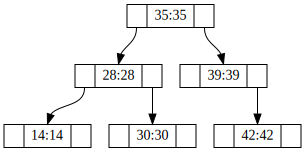

In [19]:
randavl = AVLBinarySearchTree()
randarr = [14, 28,35,39,42]
randarr.insert(30,30)
print(randarr)
for v in randarr:
    randavl[v] = v
    
viz_tree(randavl)

# Random test

[12, 1, 8, 27, 50, 2, 69, 62, 24, 41]


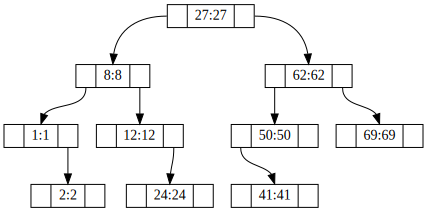

In [36]:
randavl = AVLBinarySearchTree()
randarr = random.sample(range(1, 100), 10)
print(randarr)
for v in randarr:
    randavl[v] = v
    
viz_tree(randavl)

# Color test

In [37]:
def make_colors():
    color_req = requests.get(
        'https://raw.githubusercontent.com/vim/vim/master/runtime/rgb.txt')
    color_data = color_req.text.split('\n')
    color_data = list(filter(None, color_data))
    colors = {}
    for line in color_data:
        r, g, b,*name = line.split()
        r = hex(int(r))[2:]
        g = hex(int(g))[2:]
        b = hex(int(b))[2:]
        rgb = "0x"+r+g+b
        colors[int(rgb, base=16)] = "".join(name)
        
    return colors

In [38]:
colors = make_colors()

In [39]:
avt = AVLBinarySearchTree()

In [40]:
for k,v in colors.items():
    avt[k] = v

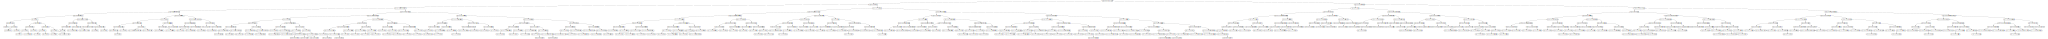

In [41]:
viz_tree(avt)

In [42]:
sorted_keys = list(colors.keys())
sorted_keys.sort()

In [43]:
avt2 = AVLBinarySearchTree()

In [44]:
for k in sorted_keys:
    avt2[k] = colors[k]

In [45]:
viz_tree(avt2)

In [46]:
avt2.root.payload

'PaleTurquoise3'

In [47]:
avt.root.payload

'X11Grey'